# Problema de los dos cuerpos,  Con masa variable.
## Computación cientifica I , Proyecto Final
Nataly Phawllyn Neira Parra Cod: 614212782

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math
from scipy.integrate import solve_ivp

#Planteamiento del sistema  de Ecuaciones

## Problema de 1 cuerpo

 Un cuerpo de masa $m_1$  bajo la acción gravitatoria de un  cuerpo de masa $M$,  con $M>>m$

 $$a=-\frac{GM}{|r|^2}\hat{r}$$
con $r$ el vector posición $r=x\hat{i}+y\hat{j}$
asi  la aceleración por componentes es

$$a=\left\{\begin{array}{c}
\ddot{x}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\hat{i}\\
\ddot{y}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y\hat{j}
\end{array} \right.$$

Pero los  metodos  conocidos  para implementar en este proyecto  son  para  EDO's  de primer  orden  asi  que  reescribiremos el sistema, sabiendo que la  velocidad $V$ es la primera derivada de la posición, por lo tanto  el sistema  queda  de la  siguiente manera

$$\left\{\begin{array}{c}
\dot{x}=V_x\\
\dot{y}=V_y\\
\dot{V}_x=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\\
\dot{V}_y=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y
\end{array} \right.$$

In [2]:
def sistema_problema_1cuerpo(t,r,Cte):
  """
  Esta  función calcula los  valores de la  aceleración  en cada componente,
   representa el sistema de EDO's dado para el problema de  un  cuerpo.
  ENTRADAS
    r[array] : el array de valores que representan las coordenadas x, y, vx,vy en un tiempo t
  SALIDAS
    a[array] : array  de valores  que representan la aceleración y velocidades  en el plano en un tiempo t
  """
  x,y,vx,vy=r
  norm_r=np.sqrt((x**2)+(y**2))

  dx=vx
  dy=vy
  dVx=-(C*x)/(norm_r**3)
  dVy=-(C*y)/(norm_r**3)

  return tuple(np.array([dx,dy,dVx,dVy], float))

##Sistema Tierra-Sol

Haremos la  prueba  con el sistema  Tierra-Sol, usando los  valores dados  por la  Nasa[2][3]  para :

*   Masa del  sol $M=1.99\times 10 ^{30}$ $kg$
*   Constante gravitacional $G=6.67\times 10^{-11}$ $\frac{m^3}{kg\text{ }s^2}$
    [1]
*   Distancia Tierra-sol semieje mayor  $r=149.598\times 10^{9}$ $m$

la  velocidad (tangencial) inicial  será  calculada  con la  formula
 $$v_0=\sqrt{\frac{GM}{r}}$$

 asi  nuestro PVI  tiene las  siguientes  condiciones iniciales


*   $x(0)= 149.598\times 10^{6}$ $m$
*   $y(0)=0$
*   $v_{x}(0)=0$
*   $v_{y}(0)=29796.59$ $m/s$




Calculo del periodo orbital [4]

$$T^2=\left(\frac{4\pi^2}{GM}\right)r^3$$

Este  sera el valor  tomado como tiempo  final

 con un valor de:
 * $t_0=0$ $s$
 *  $t_{final}=3.167\times 10^{7}$ $s$

In [3]:
G=6.67430E-11 # m^3, Kg^-1,s^-2  cte gravitacional
#M=5.9722E24   #kg  masa de la tierra
M=1.99E30      #kg  Masa del sol
C=G*M

print("Los valores a las  constantes  son  G={} m^3/ kg s^2, Masa Sol ={} kg".format(G,M))

#condiciones iniciales PVI
t0 = 0
r=149.598E9  #m   distancia  Sol-TIerra
y0 = tuple([r,0,0,np.sqrt(C/r)])  #[x0,y0,vx0,vy0]


#Condiciones de parada
t_final=np.sqrt(4*r/C)*(np.pi*r)
N = int(100)     #Número de iteraciones
t_eval= tuple(np.linspace(t0,t_final,N))
t_span=tuple(np.array([t0,t_final]))
print(" Condiciones iniciales \n x0={} m, y0={}, Vx0={}, Vy0={:.2f} m/s".format(y0[0],y0[1],y0[2],y0[3]))

#parametros de implementación numérica
f=sistema_problema_1cuerpo

Los valores a las  constantes  son  G=6.6743e-11 m^3/ kg s^2, Masa Sol =1.99e+30 kg
 Condiciones iniciales 
 x0=149598000000.0 m, y0=0, Vx0=0, Vy0=29796.59 m/s


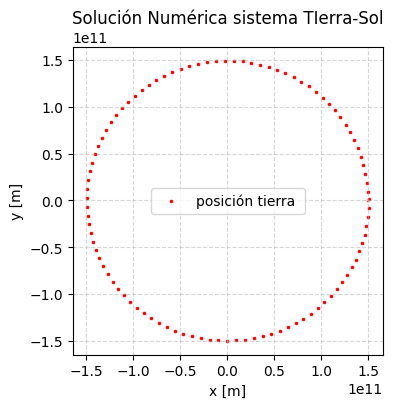

In [4]:
#aproximación de la solución
sol = solve_ivp(sistema_problema_1cuerpo, t_span, y0, method='LSODA', t_eval=t_eval, args=(C,))

xt, yt, vx, vy = sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:]

#Grafica de los resultados  en 2D
plt.figure(figsize=(4, 4))
sns.scatterplot(x=xt, y=yt, label='posición tierra ', color='red', marker ='.')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Solución Numérica sistema TIerra-Sol')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


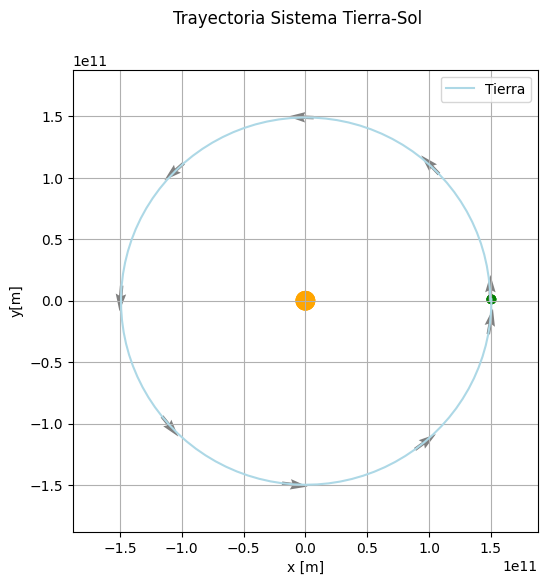

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

startangle = np.pi/4
ballradius = 4E9
ballradius2 = 8E9

moon = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='green', figure=fig)
Earth = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius2, fc='orange', figure=fig)


nframes = len(xt)  # El número de fotogramas es igual al número de puntos en la trayectoria
milisec = 50

hist_x1 = []
hist_y1 = []

path, = ax.plot(hist_x1, hist_y1, figure=fig, label="Tierra" ,color='lightblue')


hist_x1.append(xt[0])
hist_y1.append(yt[0])


bound = np.max(abs(xt))*1.25

def init():
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.add_artist(moon)
    ax.add_artist(Earth)
    return moon,Earth,path

def animate(i):
    x = xt[i]
    y = yt[i]
    moon.center = (x, y)
    hist_x1.append(x)
    hist_y1.append(y)
    path.set_data(hist_x1[:], hist_y1[:])


    # Dibuja los vectores de velocidad
    if i % 12 == 0:  # Dibuja solo algunos vectores para evitar solapamiento
        velx = vx[i] / 1E3
        vely = vy[i] / 1E3
        ax.quiver(x, y, velx, vely, color='grey')


    return moon, path

ax.set_xlabel("x [m]")
ax.set_ylabel("y[m]")
plt.suptitle("Trayectoria Sistema Tierra-Sol")
plt.legend()
animation = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=80, blit=True)
animation.save('ballpath1.gif')

plt.show()


## Problema de 2 cuerpos  masas  comparables
 Tenemos dos cuerpos de masas comparables $m_1$ y $m_2$ bajo la accion mutua gravitatoria.

 $$f_{12}=-\frac{Gm_1m_2}{|r|^2}\hat{r}$$
con $r$ el vector posición

$r=r_1-r_2$ centrado en el origen
$r=(x_1-x_2)\hat{i}+(y_1-y_2)\hat{j}$



 Planteando los  diagramas de cuerpo libre sobre  la masa  1 tenemos que la aceleración de este es

$$a_1=\left\{\begin{array}{c}
\ddot{x_1}=-\frac{Gm_2}{((x_1-x_2)^2+(y_1-y_2)^2)^\frac{3}{2}}(x_1-x_2)\hat{i}\\
\ddot{y_1}=-\frac{Gm_2}{((x_1-x_2)^2+(y_1-y_2)^2)^\frac{3}{2}}(y_1-y_2)\hat{j}
\end{array} \right.$$

 veamos  ahora que este  munto esta planteado  con elsistma deejes coordenados  fueradelcentro de masa, y dado que este no se mueve, podemos  ubicarlo  justo alli, para eso  concideremos las coordenadas del centro de masa

$$X_{cm}=\frac{m_1x_1+m_2x_2}{m_1+m_2}$$
$$Y_{cm}=\frac{m_1y_1+m_2y_2}{m_1+m_2}$$

Si queremos que estas sean cero podemos encontrar la relación entre las coordenadas  de ambas  masas $$x_1=-\frac{m_2}{m_1}x_2;y_1=-\frac{m_2}{m_1}y_2 $$ asi que   basta  con solucionar el conjunto de ecuaciones para un cuerpo  con  $r$ de la forma
 $$ r=\frac{m_1+m_2}{m_2}(x_1\hat{i}+y_1\hat{j})$$  cuya norma es
  $$ |r|=\frac{m_1+m_2}{m_2}(x_1^2+y_1^2)^{1/2}$$
 generalizando  el sistema

  $$ \dot{x}= V_x$$
  $$ \dot{y}= V_y$$
  $$ \dot{V_x}= -\frac{G(m_2^3)x_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}$$
  $$ \dot{V_y}= -\frac{G(m_2^3)y_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}$$

y al final se hace una correción para  las coordenadas para la  masa 2
   $$r_2=-\frac{m_1}{m_2}r_1$$
   

In [6]:
def sistema_problema_2cuerpo(t,r,K):
  """
  Esta  función calcula los  valores de la  aceleración  en cada componente,
   representa el sistema de EDO's dado para el problema de  un  cuerpo.
  ENTRADAS
    r[array] : el array de valores que representan las coordenadas x, y, vx,vy en un tiempo t
  SALIDAS
    a[array] : array  de valores  que representan la aceleración y velocidades  en el plano en un tiempo t
  """
  x,y,vx,vy=r
  norm_r=np.sqrt((x**2)+(y**2))

  dx=vx
  dy=vy
  dVx=(K*x)/(norm_r**3)
  dVy=(K*y)/(norm_r**3)

  return np.array([dx,dy,dVx,dVy])



## Sistema Binario Alpha Centauri
Haremos la  prueba  con el sistema de estrallas binarias Alpha centauri, que esta  conformado por dos estrellas  de masas comparables al sol: ALpha centauri a y alpha centauri B. para estaimplementación  se usan  los  valores  teoricos conocidos [7]  para :

*   Masa Alpha centauri A $=1.1 $ $M_{\odot}$
*   Masa Alpha centauri B $=0.97 $ $M_{\odot}$
*   Constante gravitacional $G=4\pi ^2$ $UA^3 M_{\odot}^{-1} AS^{-2}$
    
*   Distancia media  A-B   $r= 23.5 $ $UA$
*   periodo  orbital    $t_{final}=79.91 $ $AS$

Se consideran las  relaciones explicadas enel sistema  y se el obtiene un conjuntode condiciones iniciales para la alpha centauri B

$$\left\{\begin{array}{c}
x_0=23 (m_2/M) \\
y_0=0\\
vx_0=0.8 \\
vy_0=0\\
\end{array} \right.$$

una  vez  encontrada las coordenas  y velocidades de Alpha  centauri B se encuentran las de la mediante la relación

$$r_2=-\frac{m_1}{m_2}r_1$$
$$V_2=-\frac{m_1}{m_2}V_1$$

In [7]:
G=4*(np.pi**2)  #UA^3 *Ms^-1*(Año sideral)^-2
m1=0.907   #Ms   masas solares   alpha centaury B
m2=1.1     #Ms   masas solares   alpha centaury A

M=m1+m2
C=G*M
K=-G*(m2**3)/(M**2)

print("Los valores a las  constantes  son  G={} m^3/ kg s^2,masa 1 ={} M solares , masa 2={} M solares".format(G,m1,m2))

#Condiciones de parada
t_final=79.91 #80  Años  siderales
N = int(100)     #Número de iteraciones

#condiciones iniciales PVI
t0 = 0
r=(m2/M)*23  #23.5 distancia A_B
v0=0.8# (2*np.pi*r/t_final)#5.358 #UA/año sideral  -> 25.4 Km/h
y0 = np.array([r,0,0,v0])

#parametros de implementación numérica
t_eval= tuple(np.linspace(t0,t_final,N))
t_span=tuple(np.array([t0,t_final]))
f=sistema_problema_2cuerpo


Los valores a las  constantes  son  G=39.47841760435743 m^3/ kg s^2,masa 1 =0.907 M solares , masa 2=1.1 M solares


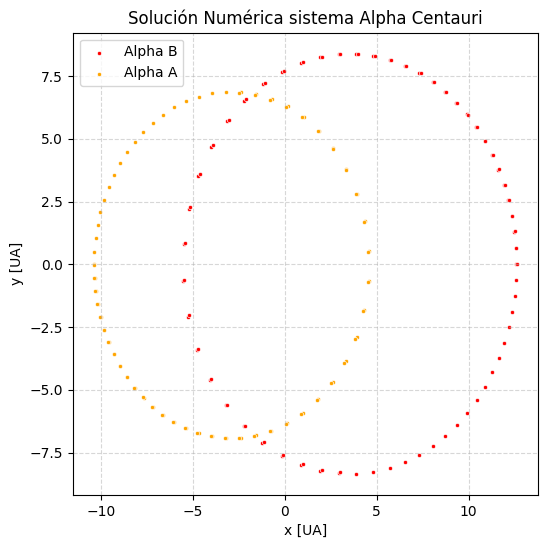

In [8]:
#aproximación de la solución
sol = solve_ivp(sistema_problema_2cuerpo, t_span, y0, method='LSODA', t_eval=t_eval, args=(K,))

xt, yt, vx, vy = sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:]

xt2=-(m1/m2)*xt
yt2=-(m1/m2)*yt
vx2=-(m1/m2)*vx
vy2=-(m1/m2)*vy

#Grafica de los resultados  en 2D
plt.figure(figsize=(6, 6))
sns.scatterplot(x=xt, y=yt, label='Alpha B', color='red', marker ='.')
sns.scatterplot(x=xt2, y=yt2, label='Alpha A', color='orange', marker ='.')
plt.legend()
plt.xlabel('x [UA]')
plt.ylabel('y [UA]')
plt.title('Solución Numérica sistema Alpha Centauri')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

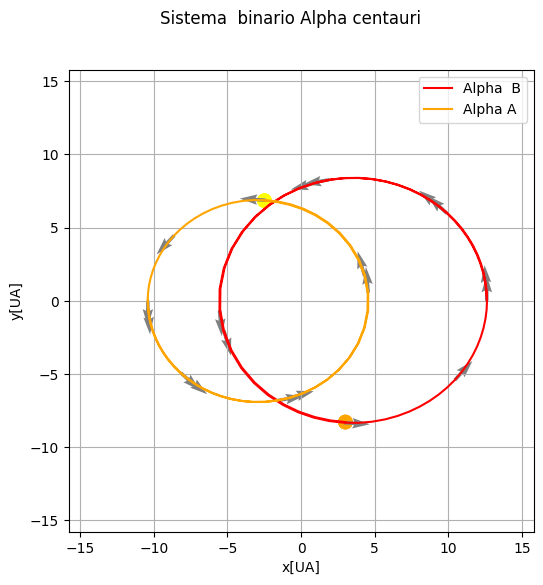

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

startangle = np.pi/4
ballradius = 0.5


moon = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='orange', figure=fig)
moon2 = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='yellow', figure=fig)

nframes = len(xt)  # El número de fotogramas es igual al número de puntos en la trayectoria
milisec = 50

hist_x1 = []
hist_y1 = []
hist_x2 = []
hist_y2 = []
path, = ax.plot(hist_x1, hist_y1, figure=fig, label="Alpha  B" ,color='red')
path2, = ax.plot(hist_x2, hist_y2, figure=fig, label="Alpha A" ,color='orange')
x = xt
y = yt

hist_x1.append(xt[0])
hist_y1.append(yt[0])

x2 = xt2
y2 = yt2

hist_x2.append(xt2[0])
hist_y2.append(yt2[0])

bound = np.max(abs(xt))*1.25

def init():
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.add_artist(moon)
    ax.add_artist(moon2)

    return moon,moon2,path,path2,

def animate(i):
    x = xt[i]
    y = yt[i]
    moon.center = (x, y)
    hist_x1.append(x)
    hist_y1.append(y)
    path.set_data(hist_x1[:], hist_y1[:])

    x2 = xt2[i]
    y2 = yt2[i]
    moon2.center = (x2, y2)
    hist_x2.append(x2)
    hist_y2.append(y2)
    path2.set_data(hist_x2[:], hist_y2[:])

    # Dibuja los vectores de velocidad
    if i % 10 == 0:  # Dibuja solo algunos vectores para evitar solapamiento
        velx = vx[i] / 1E3
        vely = vy[i] / 1E3
        ax.quiver(x, y, velx, vely, color='grey')

        velx2 = vx2[i] / 1E3
        vely2 = vy2[i] / 1E3
        ax.quiver(x2, y2, velx2, vely2, color='grey')


    return moon,moon2, path,path2

ax.set_xlabel("x[UA]")
ax.set_ylabel("y[UA]")
plt.suptitle("Sistema  binario Alpha centauri ")
plt.legend()
animation = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=80, blit=True)
animation.save('ballpath2.gif')

plt.show()

#Masa Variable

## Problema de 1 cuerpo, masa  variable  en m

 Un cuerpo de masa $m_1$  bajo la acción gravitatoria de un  cuerpo de masa $M$,  con $M>>m$
 $$\frac{dp}{dt}=\frac{d(mv)}{dt}=\dot{m}v+ma=F$$

 Para este problema  consideramos  $m$   variable en  función del tiempo $m(t)$   con  perdida de masa  cuya  variación es $\dot{m}=\alpha m^2$  asi  la  aceleración queda

 $$a=-\frac{GM}{|r|^2}\hat{r}-(\alpha m)\dot{r}$$
con $r$ el vector posición $r=x\hat{i}+y\hat{j}$
asi  la aceleración por componentes es

$$a=\left\{\begin{array}{c}
\ddot{x}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\hat-(\alpha m)V_x\\
\ddot{y}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y\hat-(\alpha m)V_y
\end{array} \right.$$

Pero los  metodos  conocidos  para implementar en este proyecto  son  para  EDO's  de primer  orden  asi  que  reescribiremos el sistema, sabiendo que la  velocidad $V$ es la primera derivada de la posición, por lo tanto  el sistema  queda  de la  siguiente manera

$$\left\{\begin{array}{c}
\dot{x}=V_x\\
\dot{y}=V_y\\
\dot{V}_x=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x-(\alpha m)V_x\\
\dot{V}_y=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y-(\alpha m)V_y\\
\dot{m}=\alpha m^2
\end{array} \right.$$

Si $\alpha<0$ es perdida de masa en el tiempo, si $\alpha>0$ es ganancia de masa
 y si $\alpha=0$ la masa es constante

In [10]:
def sistema_problema_1cuerpo_mv(t,r,alpha,C):
  """
  Esta  función calcula los  valores de la  aceleración  en cada componente,
   representa el sistema de EDO's dado para el problema de  un  cuerpo.
  ENTRADAS
    r[array] : el array de valores que representan las coordenadas x, y, vx,vy en un tiempo t
  SALIDAS
    a[array] : array  de valores  que representan la aceleración y velocidades  en el plano en un tiempo t
  """
  x,y,vx,vy,m=r
  norm_r=np.sqrt((x**2)+(y**2))

  dx=vx
  dy=vy
  dVx=-(C*x)/(norm_r**3)-alpha*m*vx
  dVy=-(C*y)/(norm_r**3)-alpha*m*vx
  dm=alpha*(m**2)

  return np.array([dx,dy,dVx,dVy,dm])

Se consideran las misma condiciones iniciales  queen el sistema Tierra sol  conla diferencia de las unidades  y  lanuevacondicion inicial con $$m_0=3 \times 10^{-6} M_{\odot}$$
la masa inicial dela tierra
y con  $$\alpha=-10^{5}$$
el factor deperdida de masa  

In [11]:
G=4*(np.pi**2)  #UA^3 *Ms^-1*(Año sideral)^-2
M=1   #Ms   masas solares
alpha=-1E5  #  si es negativo,  pierdemasa, si es positivo gana masa .

C=G*M

print("Los valores a las  constantes  son  G={} UA^3 *Ms^-1*(Año sideral)^-2, Masa mayor  ={} Ms, alpha={}".format(G,M,alpha))


#condiciones iniciales PVI
t0 = 0
r=1  #UA
m0=3E-6  #Ms
v0=np.sqrt(C/r)
y0 = np.array([r,0,0,v0,m0])


#Condiciones de parada
t_final=20
N = int(200)     #Número de iteraciones


print("\n tiempo final={} año sideral ".format(t_final))

#parametros de implementación numérica
t_eval= tuple(np.linspace(t0,t_final,N))
t_span=tuple(np.array([t0,t_final]))
f=sistema_problema_1cuerpo_mv


Los valores a las  constantes  son  G=39.47841760435743 UA^3 *Ms^-1*(Año sideral)^-2, Masa mayor  =1 Ms, alpha=-100000.0

 tiempo final=20 año sideral 


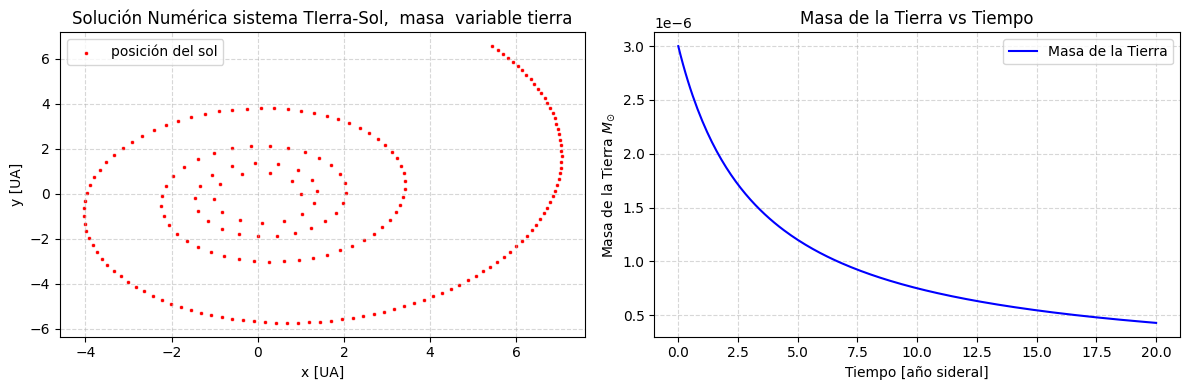

In [12]:
#aproximación de la solución
sol = solve_ivp(sistema_problema_1cuerpo_mv, t_span, y0, method='LSODA', t_eval=t_eval, args=(alpha,C))

xt, yt, vx, vy, mtierra = sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:],sol.y[4,:]

#Grafica de los resultados  en 2D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=xt, y=yt, label='posición del sol', color='red', marker ='.',ax=ax1)
ax1.legend()
ax1.set_xlabel('x [UA]')
ax1.set_ylabel('y [UA]')
ax1.set_title('Solución Numérica sistema TIerra-Sol,  masa  variable tierra')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.plot(t_eval, mtierra, label='Masa de la Tierra', color='blue')
ax2.legend()
ax2.set_xlabel('Tiempo [año sideral]')
ax2.set_ylabel('Masa de la Tierra $M_{\odot}$ ')
ax2.set_title('Masa de la Tierra vs Tiempo')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

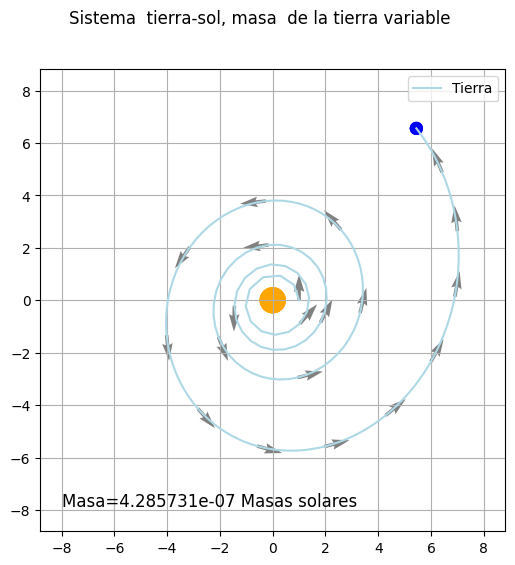

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

startangle = np.pi/4
ballradius = 0.25
ballradius2= 0.5


moon = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='blue', figure=fig)
Earth = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius2, fc='orange', figure=fig)

nframes = len(xt)  # El número de fotogramas es igual al número de puntos en la trayectoria
milisec = 50

hist_x1 = []
hist_y1 = []

path, = ax.plot(hist_x1, hist_y1, figure=fig, label="Tierra" ,color='lightblue')

x = xt
y = yt

hist_x1.append(xt[0])
hist_y1.append(yt[0])


bound = np.max(abs(xt))*1.25
text=ax.text(-8, -8, '', fontsize=12, ha='left', va='bottom')

def init():
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.add_artist(moon)
    ax.add_artist(Earth)
    text=ax.text(-8, -8, '', fontsize=12, ha='left', va='bottom')

    return Earth,path

def animate(i):
    x = xt[i]
    y = yt[i]
    moon.center = (x, y)
    Earth.center = (0, 0)
    hist_x1.append(x)
    hist_y1.append(y)
    path.set_data(hist_x1[:], hist_y1[:])



    text.set_text('Masa={:e} Masas solares '.format(mtierra[i]))
    text.set_position((-8, -8))



     # Dibuja los vectores de velocidad
    if i % 10 == 0:  # Dibuja solo algunos vectores para evitar solapamiento
        velx = vx[i] / 1E3
        vely = vy[i] / 1E3
        ax.quiver(x, y, velx, vely, color='grey')


    return moon, path, Earth, text

ax1.set_xlabel("x [UA]")
ax1.set_ylabel("y [UA]")
plt.suptitle("Sistema  tierra-sol, masa  de la tierra variable  ")
plt.legend()
animation = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=80, blit=True)
animation.save('ballpath3.gif')

plt.show()

 # Masa variable en M
 Un cuerpo de masa $m_1$  bajo la acción gravitatoria de un  cuerpo de masa $M$,  con $M>>m$


 Para este caso consideramos  $M$   variable en  función del tiempo $M(t)$   con  perdida de masa  cuya  variación es $\dot{M}=\alpha M^2$  asi  la  aceleración queda

 $$a=-\frac{GM}{|r|^2}\hat{r}$$
con $r$ el vector posición $r=x\hat{i}+y\hat{j}$
asi  la aceleración por componentes es

$$a=\left\{\begin{array}{c}
\ddot{x}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\\
\ddot{y}=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y
\end{array} \right.$$

Pero los  metodos  conocidos  para implementar en este proyecto  son  para  EDO's  de primer  orden  asi  que  reescribiremos el sistema, sabiendo que la  velocidad $V$ es la primera derivada de la posición, por lo tanto  el sistema  queda  de la  siguiente manera

$$\left\{\begin{array}{c}
\dot{x}=V_x\\
\dot{y}=V_y\\
\dot{V}_x=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}x\\
\dot{V}_y=-\frac{GM}{(x^2+y^2)^\frac{3}{2}}y\\
\dot{M}=\alpha M^2
\end{array} \right.$$

Si $\alpha<0$ es perdida de masa en el tiempo, si $\alpha>0$ es ganancia de masa
 y si $\alpha=0$ la masa es constante

In [14]:
def sistema_problema_1cuerpo_MV(t,r,G,alpha):
  """
  Esta  función calcula los  valores de la  aceleración  en cada componente,
   representa el sistema de EDO's dado para el problema de  un  cuerpo.
  ENTRADAS
    r[array] : el array de valores que representan las coordenadas x, y, vx,vy,M en un tiempo t
  SALIDAS
    a[array] : array  de valores  que representan la aceleración y velocidades  en el plano en un tiempo t
  """
  x,y,vx,vy,M=r
  norm_r=np.sqrt((x**2)+(y**2))

  dx=vx
  dy=vy
  dVx=-(G*M*x)/(norm_r**3)
  dVy=-(G*M*y)/(norm_r**3)
  dM=alpha*(M**2)


  return tuple(np.array([dx,dy,dVx,dVy,dM], float))

Se consideran las misma condiciones iniciales  queen el sistema Tierra-Sol  conla diferencia de las unidades  y  la nueva condicion inicial con $$M_0=1 M_{\odot}$$
la masa inicial del sol
y con  $$\alpha=-0.35 $$
el factor deperdida de masa  aunque tericamente es delorden de $10^{-14}$ se toma  una perdida mayor para ver los efectos en menos  tiempo  

In [15]:
G=4*(np.pi**2)  #UA^3 *Ms^-1*(Año sideral)^-2
alpha=-0.35 #-0.35E-14 esta la tasa del sol real  #  si es negativo,  pierdemasa, si es positivo gana masa .

print("Los valores a las  constantes  son  G={} UA^3 *Ms^-1*(Año sideral)^-2,  alpha={}".format(G,M,alpha))


#condiciones iniciales PVI
t0 = 0
r=1  #UA
M0=1 #Ms
v0=np.sqrt(G*M0/r)
y0 = np.array([r,0,0,v0,M0])


#Condiciones de parada
t_final=20
N = int(200)     #Número de iteraciones


#parametros de implementación numérica
t_eval= tuple(np.linspace(t0,t_final,N))
t_span=tuple(np.array([t0,t_final]))
f=sistema_problema_1cuerpo_MV


Los valores a las  constantes  son  G=39.47841760435743 UA^3 *Ms^-1*(Año sideral)^-2,  alpha=1


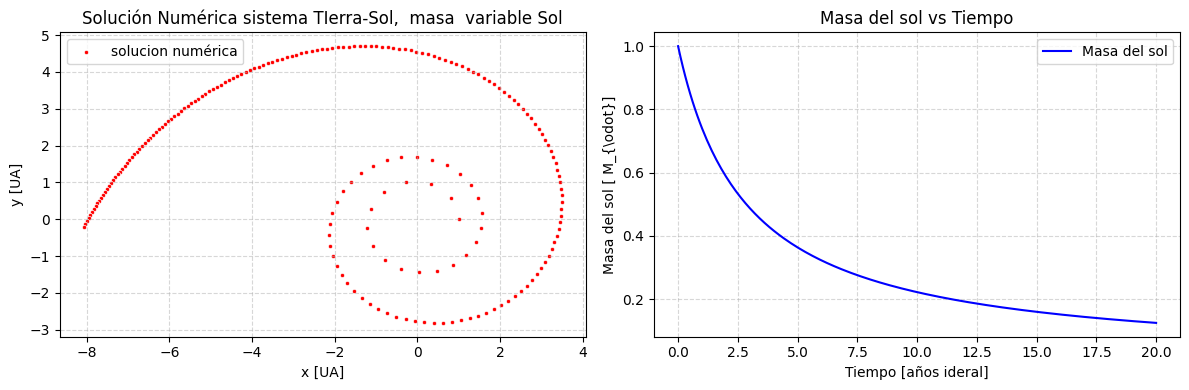

In [16]:
#aproximación de la solución
sol = solve_ivp(sistema_problema_1cuerpo_MV, t_span, y0, method='LSODA', t_eval=t_eval, args=(G,alpha))

xt, yt, vx, vy, MSol = sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:],sol.y[4,:]

#Grafica de los resultados  en 2D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=xt, y=yt, label='solucion numérica', color='red', marker ='.',ax=ax1)
ax1.legend()
ax1.set_xlabel('x [UA]')
ax1.set_ylabel('y [UA]')
ax1.set_title('Solución Numérica sistema TIerra-Sol,  masa  variable Sol')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.plot(t_eval, MSol, label='Masa del sol', color='blue')
ax2.legend()
ax2.set_xlabel('Tiempo [años ideral]')
ax2.set_ylabel('Masa del sol [ M_{\odot}]')
ax2.set_title('Masa del sol vs Tiempo')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

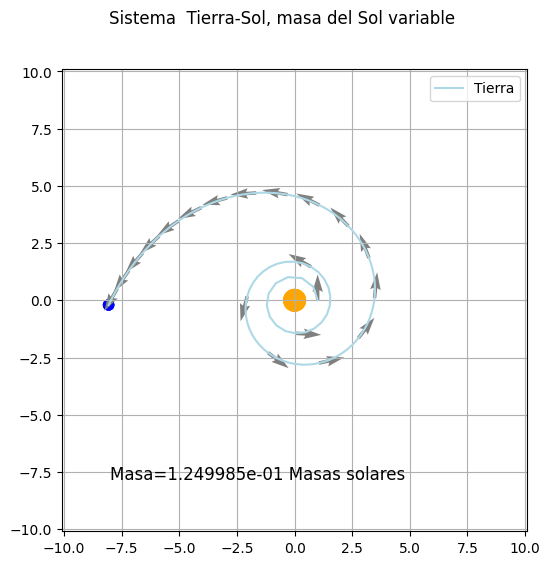

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

startangle = np.pi/4
ballradius = 0.25
ballradius2= 0.5


moon = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='blue', figure=fig)
Earth = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius2, fc='orange', figure=fig)

nframes = len(xt)  # El número de fotogramas es igual al número de puntos en la trayectoria
milisec = 50

hist_x1 = []
hist_y1 = []

path, = ax.plot(hist_x1, hist_y1, figure=fig, label="Tierra" ,color='lightblue')

x = xt
y = yt

hist_x1.append(xt[0])
hist_y1.append(yt[0])


bound = np.max(abs(xt))*1.25
text=ax.text(-8, -8, '', fontsize=12, ha='left', va='bottom')

def init():
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.add_artist(moon)
    ax.add_artist(Earth)
    text=ax.text(-8, -8, '', fontsize=12, ha='left', va='bottom')

    return Earth,path

def animate(i):
    x = xt[i]
    y = yt[i]
    moon.center = (x, y)
    Earth.center = (0, 0)
    hist_x1.append(x)
    hist_y1.append(y)
    path.set_data(hist_x1[:], hist_y1[:])



    text.set_text('Masa={:e} Masas solares '.format(MSol[i]))
    text.set_position((-8, -8))



     # Dibuja los vectores de velocidad
    if i % 10 == 0:  # Dibuja solo algunos vectores para evitar solapamiento
        velx = vx[i] / 1E3
        vely = vy[i] / 1E3
        ax.quiver(x, y, velx, vely, color='grey')


    return moon, path, Earth, text

ax1.set_xlabel("x")
ax1.set_ylabel("y")
plt.suptitle("Sistema  Tierra-Sol, masa del Sol variable  ")
plt.legend()
animation = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=80, blit=True)
animation.save('ballpath4.gif')

plt.show()

# Problema de los 2 cuerpos,  masa variable en una sola

En este caso, como las masas son comparables, basta con analizar lo que pasa cuando una de ellas depende del tiempo. Así, se considera \( m_2 \) constante y \( m_1(t) \) dependiente del tiempo. Por lo tanto,
 $$\frac{dp}{dt}=\frac{d(m_1v)}{dt}=\dot{m_1}v+m_1a=f_{12}$$

 Y como en los casos anteriores con pérdida de masa, cuya variación es $\dot{m}=\alpha m^2$  

 $$f_{12}=-\frac{Gm_1m_2}{|r|^2}\hat{r}$$
con $r$ el vector posición

$r=r_1-r_2$ centrado en el origen
$r=(x_1-x_2)\hat{i}+(y_1-y_2)\hat{j}$

Planteando los diagramas de cuerpo libre sobre la masa 1, tenemos que la aceleración de ésta es

$$a_1=\left\{\begin{array}{c}
\ddot{x_1}=-\frac{Gm_2}{((x_1-x_2)^2+(y_1-y_2)^2)^\frac{3}{2}}(x_1-x_2)\hat{i}-(\alpha m_1)V_x\\
\ddot{y_1}=-\frac{Gm_2}{((x_1-x_2)^2+(y_1-y_2)^2)^\frac{3}{2}}(y_1-y_2)\hat{j}-(\alpha m_1)V_y
\end{array} \right.$$

Al igual que en el caso anterior, consideramos las coordenadas del centro de masa y relacionamos ambas masas, esta vez teniendo en cuenta que la derivada en el tiempo tendrá en cuenta la variación de la masa $m_1$

 $$\left\{\begin{array}{c}
   r_2=-\frac{m_1}{m_2}r_1\\
   V_2=-\frac{\dot{m_1}}{m_2}r_1-\frac{m_1}{m_2}V_1
   \end{array} \right.$$

Así, no solo tendremos en cuenta las ecuaciones del sistema con masa constante, sino también las de la masa \( m_2 \). Tendremos así el sistema   

\begin{equation}
    \left\{\begin{array}{c}
   \dot{x}= V_x\\
   \dot{y}= V_y \\
   \dot{V_x}= -\frac{G(m_2^3)x_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}-(\alpha m_1)V_x\\
   \dot{V_y}= -\frac{G(m_2^3)y_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}-(\alpha m_1)V_y\\
   \dot{m_1}=\alpha m_1^2\\
   \dot{x_2}= -\alpha m_1 x_2-\frac{m_1}{m_2}V_{x}\\
   \dot{y_2}= -\alpha m_1y_2-\frac{m_1}{m_2}V_{y} \\
   \dot{V_{x2}}=-2\alpha^2 m_1x_2-(2-\alpha m_1)\frac{m_1}{m_2}V_{x}+\frac{G(m_2^2m_1)x_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}\\
   \dot{V_{y2}}= -2\alpha^2 m_1y_2-(2-\alpha m_1)\frac{m_1}{m_2}V_{y}+\frac{G(m_2^2m_1)y_1}{(m_1+m_2)^2(x_1^2+y_1^2)^{3/2}}\\
  \end{array} \right.
\end{equation}


In [18]:
def sistema_problema_2cuerpo_m1V(t,r,G,m2,alpha):
  """
  Esta  función calcula los  valores de la  aceleración  en cada componente,
   representa el sistema de EDO's dado para el problema de  un  cuerpo.
  ENTRADAS
    r[array] : el array de valores que representan las coordenadas x, y, vx,vy en un tiempo t
  SALIDAS
    a[array] : array  de valores  que representan la aceleración y velocidades  en el plano en un tiempo t
  """
  x,y,vx,vy,m1,x2,y2,vx2,vy2=r

  M=m1+m2
  C=G*M
  K=-G*(m2**3)/(M**2)
  K2=-G*(m1*m2**2)/(M**2)

  norm_r=np.sqrt((x**2)+(y**2))

  dx=vx
  dy=vy
  dVx=(K*x)/(norm_r**3)-alpha*m1*vx
  dVy=(K*y)/(norm_r**3)-alpha*m1*vy
  dm1=alpha*(m1**2)
  dx2=-(alpha*m1*x2)-(m1*vx/m2)
  dy2=-(alpha*m1*y2)-(m1*vy/m2)
  dvx2=-(2*m1*x2*alpha**2)-((2-(alpha*m1))*(m1*vx/m2))+((K2*x)/(norm_r**3))
  dvy2=-(2*m1*y2*alpha**2)-((2-(alpha*m1))*(m1*vy/m2))+((K2*y)/(norm_r**3))

  return np.array([dx,dy,dVx,dVy,dm1,dx2,dy2,dvx2,dvy2])


Se consideran lamasa  variable  ala estrella Alpha  centauri B, y tenemos las mismas condiciones iniciales  que en el sistema binario Alpha Centauri  con la nueva condicion inicial con $$M_0=0.907  M_{\odot}$$
la masa inicial del Alpha centauri B
y con  $$\alpha=-10^{-2}$$
el factor de perdida de masa  aunque  que teoricamente es mucho menor al del sol, aunque  son  estrellas  similares.

In [19]:
G=4*(np.pi**2)  #UA^3 *Ms^-1*(Año sideral)^-2
m10=0.907   #Ms   masas solares   alpha centaury B
m2=1.1     #Ms   masas solares   alpha centaury A
alpha=-1E-2  #similar al del sol
M=m10+m2

#Condiciones de parada
t_final=80*8 #80  Años  siderales
N = int(500)     #Número de iteraciones

#condiciones iniciales PVI
t0 = 0
d=1  #23,5 UA
r=(m2/M)*23
v0=0.8# (2*np.pi*r/t_final)#5.358 #UA/año sideral  -> 25.4 Km/h
r20=-(m10/m2)*r
v20=-(m10/m2)*v0
y0 = np.array([r,0,0,v0,m10,r20,0,0,v20])


#parametros de implementación numérica
t_eval= tuple(np.linspace(t0,t_final,N))
t_span=tuple(np.array([t0,t_final]))
f=sistema_problema_2cuerpo_m1V

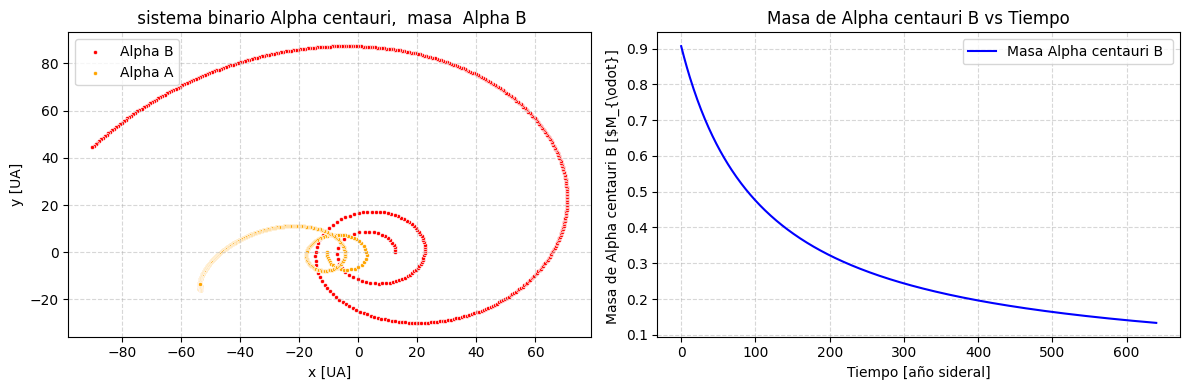

In [20]:
#aproximación de la solución
sol = solve_ivp(sistema_problema_2cuerpo_m1V, t_span, y0, method='LSODA', t_eval=t_eval, args=(G,m2,alpha))

xt, yt, vx, vy , m1, xt2, yt2, vx2, vy2= sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:],sol.y[4,:],sol.y[5,:],sol.y[6,:],sol.y[7,:],sol.y[8,:]

#Grafica de los resultados  en 2D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=xt, y=yt, label='Alpha B', color='red', marker ='.',ax=ax1)
sns.scatterplot(x=xt2, y=yt2, label='Alpha A', color='orange', marker ='.',ax=ax1)
ax1.legend()
ax1.set_xlabel('x [UA]')
ax1.set_ylabel('y [UA]')
ax1.set_title(' sistema binario Alpha centauri,  masa  Alpha B')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.plot(t_eval, m1, label='Masa Alpha centauri B ', color='blue')
ax2.legend()
ax2.set_xlabel('Tiempo [año sideral]')
ax2.set_ylabel('Masa de Alpha centauri B [$M_{\odot}] ')
ax2.set_title('Masa de Alpha centauri B vs Tiempo')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


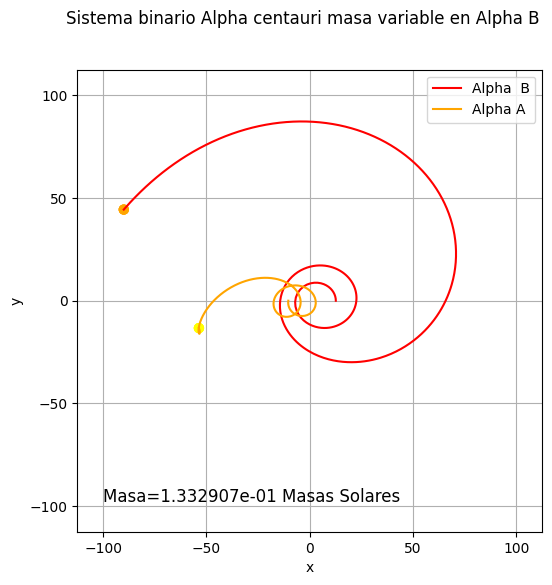

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(True)

startangle = np.pi/4
ballradius = 2.5


moon = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='Orange', figure=fig)
moon2 = plt.Circle((np.cos(startangle), np.sin(startangle)), ballradius, fc='Yellow', figure=fig)

nframes = len(xt)  # El número de fotogramas es igual al número de puntos en la trayectoria
milisec = 50

hist_x1 = []
hist_y1 = []
hist_x2 = []
hist_y2 = []
path, = ax.plot(hist_x1, hist_y1, figure=fig, label="Alpha  B" ,color='red')
path2, = ax.plot(hist_x2, hist_y2, figure=fig, label="Alpha A" ,color='orange')
x = xt
y = yt

hist_x1.append(xt[0])
hist_y1.append(yt[0])

x2 = xt2
y2 = yt2

hist_x2.append(xt2[0])
hist_y2.append(yt2[0])

bound = np.max(abs(xt))*1.25
text=ax.text(-100, -100, '', fontsize=12, ha='left', va='bottom')
def init():
    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.add_artist(moon)
    ax.add_artist(moon2)
    text=ax.text(-100, -100, '', fontsize=12, ha='left', va='bottom')

    return moon,moon2,path,path2,text

def animate(i):
    x = xt[i]
    y = yt[i]
    moon.center = (x, y)
    hist_x1.append(x)
    hist_y1.append(y)
    path.set_data(hist_x1[:], hist_y1[:])

    x2 = xt2[i]
    y2 = yt2[i]
    moon2.center = (x2, y2)
    hist_x2.append(x2)
    hist_y2.append(y2)
    path2.set_data(hist_x2[:], hist_y2[:])

    text.set_text('Masa={:e} Masas Solares'.format(m1[i]))
    text.set_position((-100, -100))


    return moon,moon2, path,path2,text

ax.set_xlabel("x")
ax.set_ylabel("y")
plt.suptitle("Sistema binario Alpha centauri masa variable en Alpha B")
plt.legend()
animation = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=80, blit=True)
animation.save('ballpath5.gif')

plt.show()

#Referencias

*   [1]Newtonian constant of gravitation. Nist.gov. Recuperado el 28 de marzo de 2024, de https://physics.nist.gov/cgi-bin/cuu/Value?bg|search_for=gravitational


*   [2]Earth fact sheet. Nasa.gov. Recuperado el 28 de marzo de 2024, de https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html

*   [3] Moon fact sheet. Nasa.gov. Recuperado el 28 de marzo de 2024, de https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html

*   [4]Walker, J., & Resnick, R. (2004). Fundamentals of physics: Chapters 1-21 v. 1 (7a ed.). John Wiley & Sons. Chapter 13, pg.349.

* [5] Sun fact sheet. Nasa.gov. Recuperado el 30 de abril de 2024, de  https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

* [6]NASA. (2011, noviembre 2). Measuring a white dwarf star. NASA https://www.nasa.gov/image-article/measuring-white-dwarf-star/#:~:text=Based%20on%20the%20Hubble%20measurements,miles%20(2.4%20million%20kilometers).

* [7]Wikipedia contributors. (s/f). Alfa Centauri. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Alfa_Centauri&oldid=159615352




